## Image denoising problem. 

**Aim:** To train an autoencoder to map noisy digits images to clean digits images.

### Load MNIST dataset and Generate noisy images

Run the below code to load and add noise to the original mnist images

In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils

In [0]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

import numpy as np
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Plot the noisy images

Run the below code to plot the noisy images

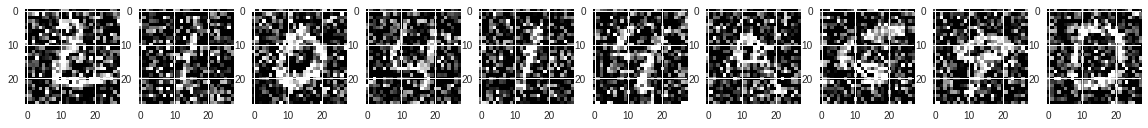

In [37]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

### Model

#### Consider the following while building the model.

1. Input layer with shape (28, 28, 1)
2. Conv2D with 32 filters with kernel size 3x3 with `relu` activation.
3. Max pooling with filter size 2x2 use padding `same` to retain the original image size.
4. Repeat step 2.
5. Repeat step 3.
6. Repeat step 2.
7. Upsampling with filter size 2x2.
8. Repeat step 2.
9. Repeat step 7.
10. Repeat step 2 with 1 filter to match the channels of image and `sigmoid` activation.
11. `binary_crossentropy` loss.


In [0]:
model = Sequential()

In [0]:
#model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add (UpSampling2D(size=(2, 2)))

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add (UpSampling2D(size=(2, 2)))


In [0]:
model.add(Convolution2D(1,(3,3), padding='same'))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
print(x_train_noisy.shape)
model.summary()

(60000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_51 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_52 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 32)          92

### model.fit() to train with 100 epochs, batch_size as 1000.

with x_train_noisy as feature and x_train as label

with x_test_noisy as feature and x_test as label

In [76]:
model.fit(x_train_noisy, x_train, batch_size=1000, nb_epoch=100, 
              validation_data=(x_test_noisy, x_test))
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 141us/step - loss: 0.3348 - acc: 0.8031 - val_loss: 0.1829 - val_acc: 0.7941
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1634 - acc: 0.8013 - val_loss: 0.1471 - val_acc: 0.8045
Epoch 3/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1404 - acc: 0.8066 - val_loss: 0.1325 - val_acc: 0.8069
Epoch 4/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1303 - acc: 0.8085 - val_loss: 0.1259 - val_acc: 0.8089
Epoch 5/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1253 - acc: 0.8093 - val_loss: 0.1220 - val_acc: 0.8082
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1220 - acc: 0.8098 - val_loss: 0.1196 - val_acc: 0.8100
Epoch 7/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1195 - acc: 0.8102 - val_loss: 0.1175 -

### Predict

Run the below code to get predictions of test set

In [0]:
denoised_imgs = model.predict(x_test_noisy)

### Plot 

Run the below code to check noised and denoised images. 

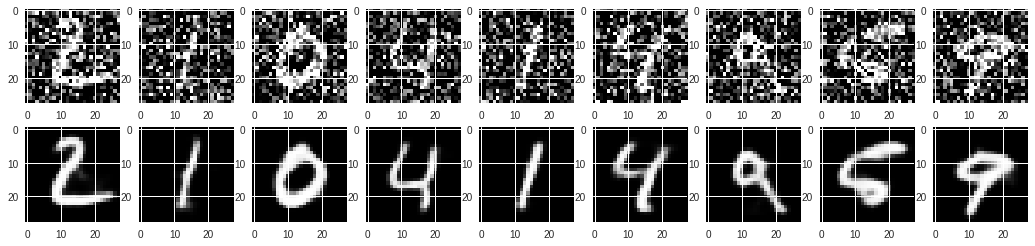

In [78]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display noisy images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))

    # display denoised images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
plt.show()